### training_example

Exemplo prático do livro "Causal Inference: The Mixtape" referente ao capítulo tratando sobre Pareamento Exato.

In [1]:
# Importando os pacotes necessários
import numpy as np 
import pandas as pd 
import statsmodels.api as sm 
import statsmodels.formula.api as smf 
from itertools import combinations 
import plotnine as p
import ssl
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Criando uma função de importação/leitura dos dados
ssl._create_default_https_context = ssl._create_unverified_context
def read_data(file):
    return pd.read_stata("https://github.com/scunning1975/mixtape/raw/master/" + file)

In [6]:
# Importando a base do github do autor usando a função criada acima
training_example = read_data("training_example.dta")
training_example = training_example[0:20] # Mantendo as 20  primeiras linhas
training_example

,unit_treat,age_treat,earnings_treat,unit_control,age_control,earnings_control,unit_matched,age_matched,earnings_matched
0,1.0,18.0,9500,1.0,20.0,8500.0,1.0,18.0,8050.0
1,2.0,29.0,12250,2.0,27.0,10075.0,2.0,29.0,10525.0
2,3.0,24.0,11000,3.0,21.0,8725.0,3.0,24.0,9400.0
3,4.0,27.0,11750,4.0,39.0,12775.0,4.0,27.0,10075.0
4,5.0,33.0,13250,5.0,38.0,12550.0,5.0,33.0,11425.0
5,6.0,22.0,10500,6.0,29.0,10525.0,6.0,22.0,8950.0
6,7.0,19.0,9750,7.0,39.0,12775.0,7.0,19.0,8275.0
7,8.0,20.0,10000,8.0,33.0,11425.0,8.0,20.0,8500.0
8,9.0,21.0,10250,9.0,24.0,9400.0,9.0,21.0,8725.0
9,10.0,30.0,12500,10.0,30.0,10750.0,10.0,30.0,9875.0


C:\Users\guhhh\anaconda3\lib\site-packages\plotnine\layer.py:333: PlotnineWarning: stat_bin : Removed 10 rows containing non-finite values.


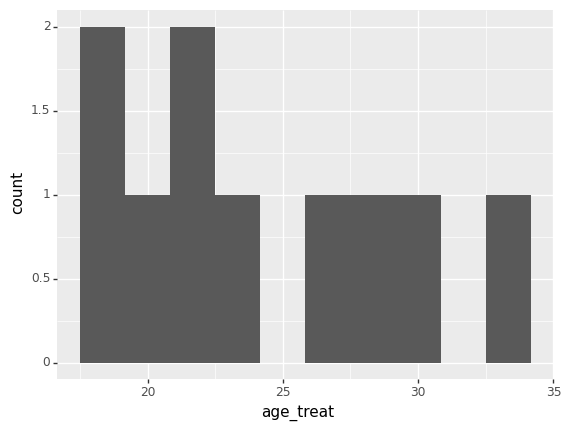

<ggplot: (96657344139)>

In [7]:
# Gerando um histograma da distribuição de idade do grupo "tratado" (trainees)
p.ggplot(training_example, p.aes(x='age_treat')) +  p.stat_bin(bins = 10)

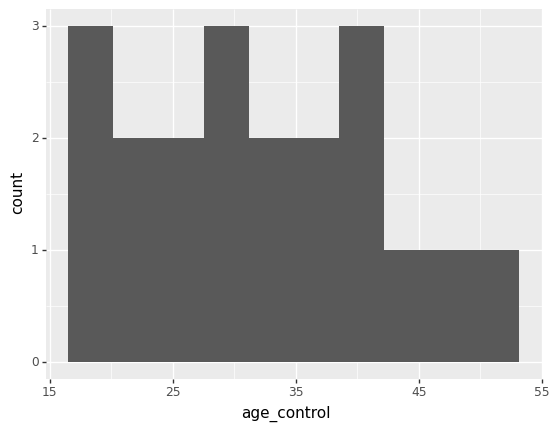

<ggplot: (96657446205)>

In [9]:
# Gerando um histograma da distribuição de idade do grupo "controle" (non-trainees)
p.ggplot(training_example, p.aes(x='age_control')) +  p.geom_histogram(bins = 10)

Visualmente, comparada os dois gráficos, podemos constatar o quão diferentes são os dois grupos com relação a covariada de idade.

### training_bias_reduction

Exemplo prático do livro "Causal Inference: The Mixtape" referente ao capítulo tratando sobre Pareamento Aproximado.

In [33]:
# Importando a base do git do autor usando a função criada acima
training_bias_reduction = read_data("training_bias_reduction.dta")
#training_bias_reduction.set_index("Unit", drop=False, inplace=True)
training_bias_reduction

,Unit,Y,D,X
0,1,5,1,11
1,2,2,1,7
2,3,10,1,5
3,4,6,1,3
4,5,4,0,10
5,6,0,0,8
6,7,5,0,4
7,8,1,0,1


In [39]:
# Tratando a base
training_bias_reduction['Y1'] = 0 # Gerando a coluna referente ao resultado dos tratados e atribuindo seus respectivos valores
training_bias_reduction.loc[training_bias_reduction['Unit'].isin(range(1,5)), 'Y1'] = training_bias_reduction.Y[0:4]
training_bias_reduction['Y0'] = (4,0,5,1,4,0,5,1) # Gerando a coluna referente ao resultado contrafactual
training_bias_reduction

,Unit,Y1,Y0,Y,D,X,u_hat0
0,1,5,4,5,1,11,3.888071
1,2,2,0,2,1,7,4.082474
2,3,10,5,10,1,5,4.179676
3,4,6,1,6,1,3,4.276878
4,5,0,4,4,0,10,3.936672
5,6,0,0,0,0,8,4.033873
6,7,0,5,5,0,4,4.228277
7,8,0,1,1,0,1,4.374080


In [40]:
# Estimando a correção de viés
train_reg = sm.OLS.from_formula('Y ~ X', training_bias_reduction).fit()
train_reg.summary()

C:\Users\guhhh\anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.163
Method:                 Least Squares   F-statistic:                   0.01702
Date:                Sun, 29 Jan 2023   Prob (F-statistic):              0.900
Time:                        16:01:24   Log-Likelihood:                -20.066
No. Observations:                   8   AIC:                             44.13
Df Residuals:                       6   BIC:                             44.29
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.4227      2.584      1.711      0.138      -1.901      10.746
X             -0.0486      0.373     -0.130      0.900      -0.960       0.863
==============================================================================
Omnibus:                        0.718   Durbin-Watson:                   2.112
Prob(Omnibus):                  0.698   Jarque-Bera (JB):                0.328
Skew:                           0.433   Prob(JB):                        0.849
Kurtosis:                       2.517   Cond. No.                         15.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [41]:
# Gerando o df final com todos os valores de interesse
training_bias_reduction['u_hat0'] = train_reg.predict(training_bias_reduction)
training_bias_reduction = training_bias_reduction[['Unit', 'Y1', 'Y0', 'Y', 'D', 'X', 'u_hat0']]
training_bias_reduction.Y1.replace(0, np.nan, inplace=True)
training_bias_reduction

,Unit,Y1,Y0,Y,D,X,u_hat0
0,1,5.0,4,5,1,11,3.888071
1,2,2.0,0,2,1,7,4.082474
2,3,10.0,5,10,1,5,4.179676
3,4,6.0,1,6,1,3,4.276878
4,5,NaN,4,4,0,10,3.936672
5,6,NaN,0,0,0,8,4.033873
6,7,NaN,5,5,0,4,4.228277
7,8,NaN,1,1,0,1,4.374080
